# REDSHIFT DISTRIBUTION OF GALAXIES

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sc

In [2]:
mu = np.array([0.929, 1.278, 1.860, 2.473]) * 1000 / 0.7
eta = np.array([1.235, 0.832, 0.551, 0.412]) * 0.7 / 1000

alpha = 1.0 / (mu * eta - 1.0)
beta = eta / (mu * eta -1.0)

THREE_2C2 = 1.669e-11
INVERSE_C = 3.333e-6

In [3]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67.11, Ob0=0.049, Om0= 0.2685)
z_list = np.linspace(0, 1100,num=1000000)
xl = cosmo.comoving_distance(z_list).value

## Redshift distribution of galaxies

In [4]:
def redshift_distribution_galaxies(x, ibin):
    a = alpha[ibin - 1]
    b = beta[ibin - 1]

    return np.power(b, a + 1.0) * np.power(x, a) * np.exp(- b * x) / sc.gamma(a + 1.0)

In [5]:
n1 = redshift_distribution_galaxies(xl, 1)
n2 = redshift_distribution_galaxies(xl, 2)
n3 = redshift_distribution_galaxies(xl, 3)
n4 = redshift_distribution_galaxies(xl, 4)

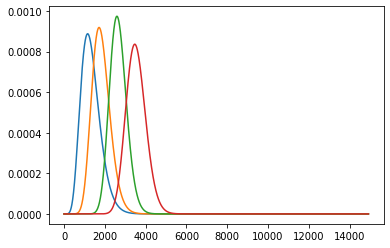

In [6]:
plt.plot(xl, n1)
plt.plot(xl, n2)
plt.plot(xl, n3)
plt.plot(xl, n4);

In [7]:
nz1 = np.exp(-0.5*((xl - 800)/50)**2)
nz1[nz1 < 1e-3] = 0
nz1 /= np.trapz(nz1, xl)
nz2 = np.exp(-0.5*((xl - 1200)/50)**2)
nz2[nz2 < 1e-3] = 0
nz2 /= np.trapz(nz2, xl)

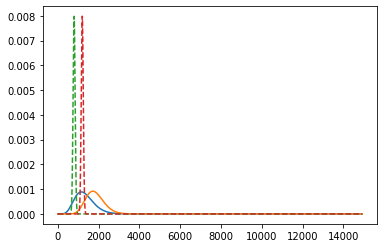

In [8]:
plt.plot(xl, n1)
plt.plot(xl, n2)
plt.plot(xl, nz1, '--')
plt.plot(xl, nz2, '--')

## Cosmic shear

In [9]:
def lensing_efficiency(x, ibin):
    a = alpha[ibin - 1]
    b = beta[ibin - 1]

    t1 = sc.gammaincc(a + 1, b * x)
    t2 = b * x * sc.gammaincc(a, b * x) / a

    return t1 - t2

In [10]:
q1 = lensing_efficiency(xl, 1)
q2 = lensing_efficiency(xl, 2)
q3 = lensing_efficiency(xl, 3)
q4 = lensing_efficiency(xl, 4)

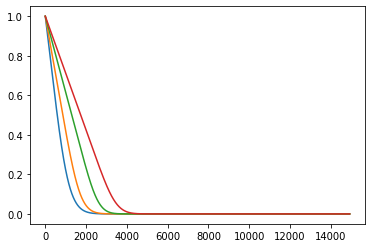

In [11]:
plt.plot(xl, q1)
plt.plot(xl, q2)
plt.plot(xl, q3)
plt.plot(xl, q4);

In [19]:
TINY = np.finfo(0.).tiny
# qz1 = np.trapz(np.clip(xl - xl[:,None], 0, None)/(xl+TINY)*nz1, xl)
# qz2 = np.trapz(np.clip(xl - xl[:,None], 0, None)/(xl+TINY)*nz2, xl)

### Convergence

In [13]:
def filter_convergence(x, zx, lens_efficiency, cosmology):
    factor = THREE_2C2 * np.square(cosmology.H0) * cosmology.Om0
    return factor * (1.0 + zx) * lens_efficiency * x

In [14]:
fc1 = filter_convergence(xl, z_list, q1, cosmo)
fc2 = filter_convergence(xl, z_list, q2, cosmo)
fc3 = filter_convergence(xl, z_list, q3, cosmo)
fc4 = filter_convergence(xl, z_list, q4, cosmo)

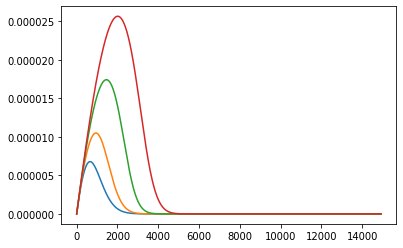

In [15]:
plt.plot(xl, fc1)
plt.plot(xl, fc2)
plt.plot(xl, fc3)
plt.plot(xl, fc4);

In [ ]:
# f1 = 1.669e-11*pars.H0**2*pars.omegam*(1+zchi)*chi*q1
# f2 = 1.669e-11*pars.H0**2*pars.omegam*(1+zchi)*chi*q2

### Shear

In [16]:
def filter_shear(x, zx, lens_efficiency, cosmology):
    factor = THREE_2C2 * np.square(cosmology.H0) * cosmology.Om0
    return factor.value * (1.0 + zx) * lens_efficiency / x

In [20]:
TINY

2.2250738585072014e-308

In [25]:
fs1 = filter_shear(xl+TINY, z_list, q1, cosmo)
fs2 = filter_shear(xl+TINY, z_list, q2, cosmo)
fs3 = filter_shear(xl+TINY, z_list, q3, cosmo)
fs4 = filter_shear(xl+TINY, z_list, q4, cosmo)

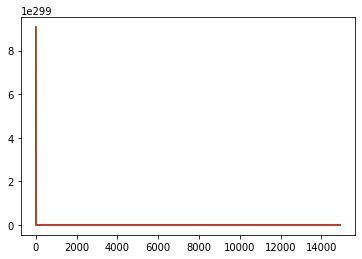

In [26]:
plt.plot(xl+TINY, fs1)
plt.plot(xl+TINY, fs2)
plt.plot(xl+TINY, fs3)
plt.plot(xl+TINY, fs4);

## Galaxy clustering

In [11]:
def filter_galaxy_clustering(x, zx, nz, linear_bias, cosmology):
    H = (cosmology.H0 * cosmology.efunc(zx)).value
    return H * linear_bias * nz * INVERSE_C

In [12]:
fg1 = filter_galaxy_clustering(xl, z_list, n1, 1.0, cosmo)
fg2 = filter_galaxy_clustering(xl, z_list, n2, 1.0, cosmo)
fg3 = filter_galaxy_clustering(xl, z_list, n3, 1.0, cosmo)
fg4 = filter_galaxy_clustering(xl, z_list, n4, 1.0, cosmo)

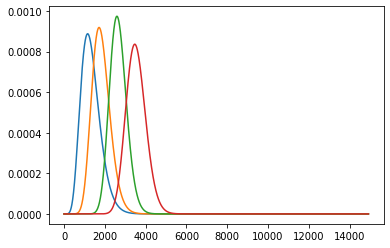

In [13]:
plt.plot(xl, n1)
plt.plot(xl, n2)
plt.plot(xl, n3)
plt.plot(xl, n4);